# 1. 패키지 로드 + 그래프 한글 지정 + 경고 메시지 생략

In [1]:
# matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# seaborn
import seaborn as sns

# pandas
import pandas as pd

# numpy
import numpy as np

# warnings
import warnings
warnings.filterwarnings(action='ignore')

# 한글
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 2. 빅데이터 다운로드

## 1) df_first = 2013~2015년

In [2]:
df_first = pd.read_csv('C:/bigData/Download/SharedBigdata/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')

In [3]:
df_first.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [4]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

## 2) df_last = 2015년 이후

In [5]:
df_last = pd.read_csv('C:/bigData/Download/SharedBigdata/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv', encoding='cp949')

In [6]:
df_last.head(3)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882


In [7]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

# 3. df_last : 결측치 확인

In [8]:
df_last.isna().sum() 

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

# 4. df_last : 평당분양가격 컬럼 추가

In [9]:
def to_pyeong(x) :
    if  x == ' ' :
        return np.nan
    elif x == '  ' :
        return np.nan
    elif x is None :
        return np.nan
    else : 
        if str(x).find(',') == -1 :
            temp_4_2 = float(x) * 3.3
        else :
            temp_4_1 = str(x).split(',')
            temp_4_2 = float(temp_4_1[0]+temp_4_1[1]) * 3.3
        return temp_4_2

In [10]:
df_last['평당분양가격'] = df_last['분양가격(㎡)'].map(to_pyeong)

In [11]:
print(df_last.isnull().sum())

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
평당분양가격     465
dtype: int64


In [12]:
df_last.dropna(inplace = True)
df_last.head(3)

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,모든면적,2015,10,5841,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410.6


# 5. df_last 전용면적 컬럼 추가

In [13]:
def to_simple(x) : 
    temp_5_1 =  x.replace(' ','').replace('모든면적','전체').replace('전용면적', '').replace('초과','~').replace('이하','')
    return temp_5_1

In [14]:
df_last['전용면적'] = df_last['규모구분'].apply(to_simple)
df_last.loc[:, ['규모구분', '전용면적']]

,규모구분,전용면적
0,모든면적,전체
1,전용면적 60㎡이하,60㎡
2,전용면적 60㎡초과 85㎡이하,60㎡~85㎡
3,전용면적 85㎡초과 102㎡이하,85㎡~102㎡
4,전용면적 102㎡초과,102㎡~
...,...,...
5773,전용면적 85㎡초과 102㎡이하,85㎡~102㎡
5774,전용면적 102㎡초과,102㎡~
5775,모든면적,전체
5777,전용면적 60㎡초과 85㎡이하,60㎡~85㎡


# 6. 메모리 사용 비교 (규모+m2가격 제거 전후)

In [15]:
df_last.info()   # memory usage: 461.2+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5315 entries, 0 to 5779
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5315 non-null   object 
 1   규모구분     5315 non-null   object 
 2   연도       5315 non-null   int64  
 3   월        5315 non-null   int64  
 4   분양가격(㎡)  5315 non-null   object 
 5   평당분양가격   5315 non-null   float64
 6   전용면적     5315 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 332.2+ KB


In [16]:
df_last.drop(['규모구분', '분양가격(㎡)'], axis=1, inplace=True)

In [17]:
df_last.info()   # memory usage: 378.2+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5315 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     5315 non-null   object 
 1   연도      5315 non-null   int64  
 2   월       5315 non-null   int64  
 3   평당분양가격  5315 non-null   float64
 4   전용면적    5315 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 249.1+ KB


# 7. GroupBy(unstack()함수 이용) vs. pivot_table

# 8. 선그래프와 막대그래프로 시각화

# 9. seaborn 으로 시각화

## 7-1) 지역별 데이터 수

In [18]:
temp_7_1 = df_last.groupby('지역명')['지역명'].count().to_frame(name = '데이터수')
temp_7_1.reset_index(inplace=True)
temp_7_1

,지역명,데이터수
0,강원,328
1,경기,340
2,경남,331
3,경북,318
4,광주,285
5,대구,331
6,대전,255
7,부산,340
8,서울,340
9,세종,285


In [19]:
temp_7_1 = df_last.pivot_table(index = '지역명', aggfunc='count')
temp_7_1 = temp_7_1.reset_index().iloc[:,0:2]
temp_7_1.columns = ['지역명', '데이터수']
temp_7_1

,지역명,데이터수
0,강원,328
1,경기,340
2,경남,331
3,경북,318
4,광주,285
5,대구,331
6,대전,255
7,부산,340
8,서울,340
9,세종,285


### 8-1) 7-1의 그래프

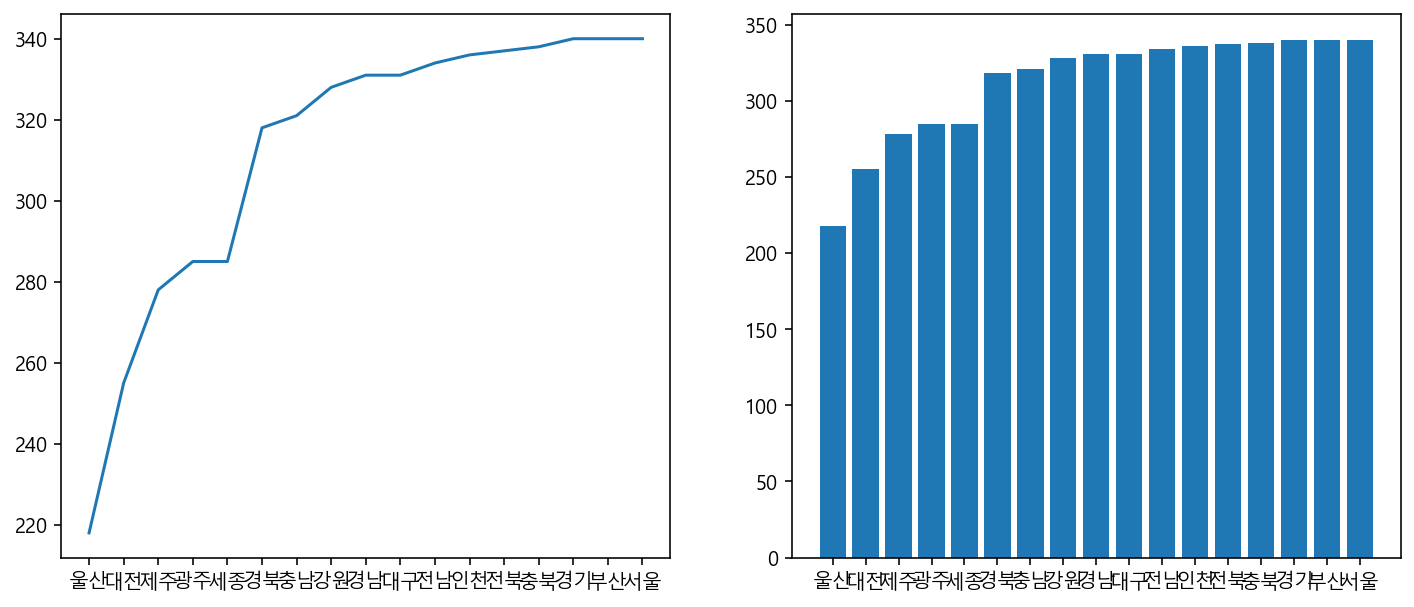

In [20]:
temp_8_1 = temp_7_1.copy()
temp_8_1.sort_values(by = '데이터수', inplace=True)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
axes[0].plot(temp_8_1.지역명, temp_8_1.데이터수)
axes[1].bar(temp_8_1.지역명, temp_8_1.데이터수)
plt.show()

### 9-1) 8-1의 seaborn 그래프

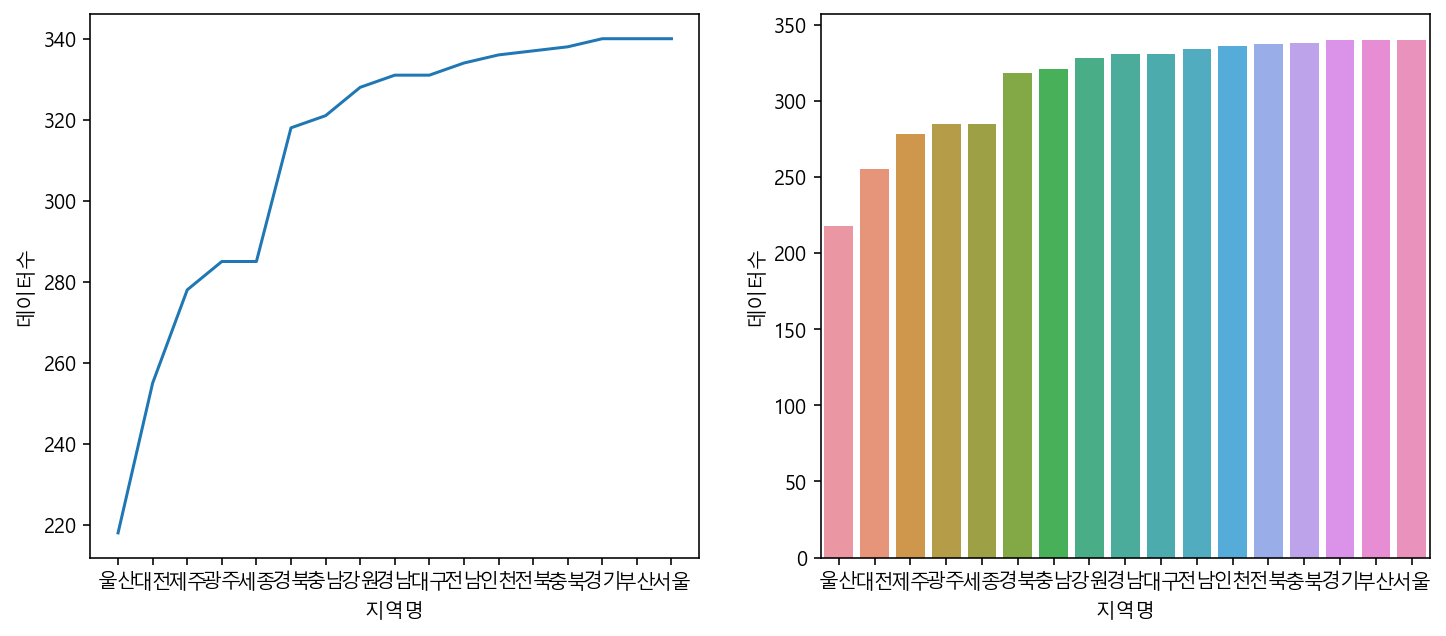

In [21]:
temp_9_1 = temp_8_1.copy()
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.lineplot(data = temp_9_1, x = '지역명', y = '데이터수', ax = axes[0])
sns.barplot(data = temp_9_1, x = '지역명', y = '데이터수', ax = axes[1])
plt.show()

## 2) 지역별 평당분양가격 (평균)

In [22]:
temp_7_2 = df_last.groupby('지역명')['지역명','평당분양가격'].mean()
temp_7_2.reset_index(inplace=True)
temp_7_2

,지역명,평당분양가격
0,강원,8503.264939
1,경기,13747.440882
2,경남,9686.955589
3,경북,8839.610377
4,광주,10939.650526
5,대구,12860.468882
6,대전,10442.688235
7,부산,12436.729412
8,서울,25055.298529
9,세종,10137.993684


In [23]:
temp_7_2 = df_last.pivot_table(index = '지역명', aggfunc='mean')
temp_7_2.reset_index(inplace=True)
temp_7_2[['지역명','평당분양가격']]

,지역명,평당분양가격
0,강원,8503.264939
1,경기,13747.440882
2,경남,9686.955589
3,경북,8839.610377
4,광주,10939.650526
5,대구,12860.468882
6,대전,10442.688235
7,부산,12436.729412
8,서울,25055.298529
9,세종,10137.993684


### 8-2) 7의 그래프

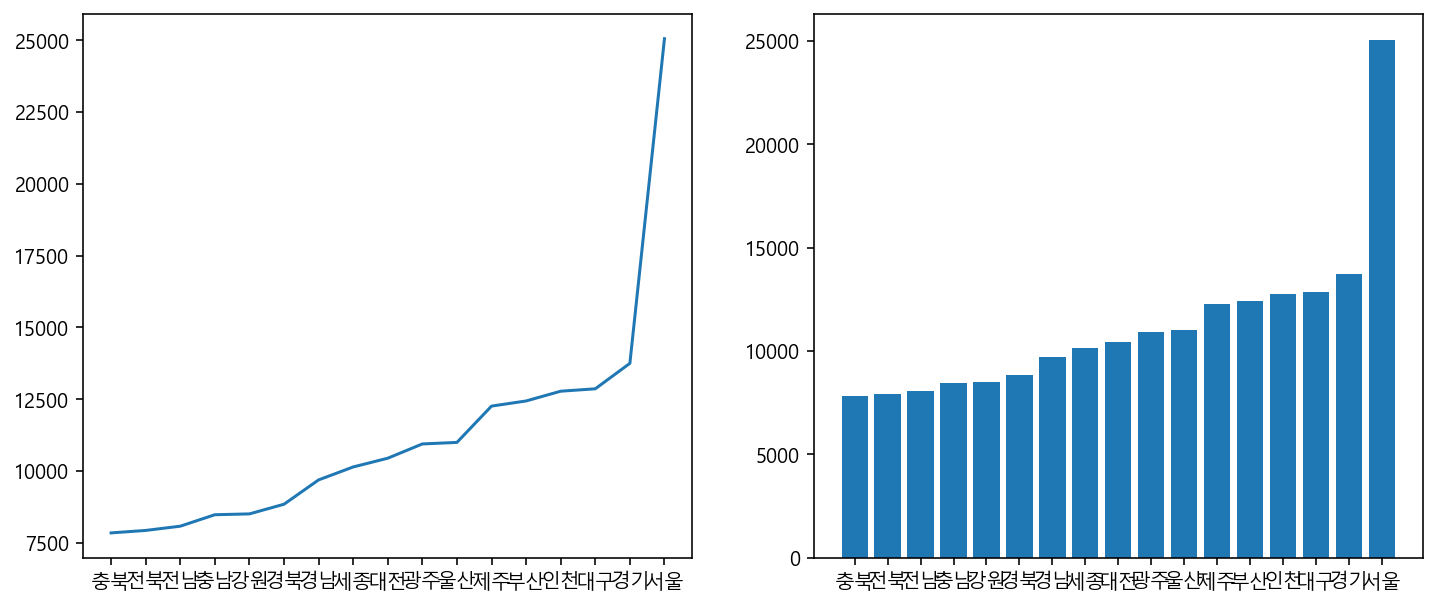

In [24]:
temp_8_2 = temp_7_2.copy()
temp_8_2.sort_values(by = '평당분양가격', inplace=True)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
axes[0].plot(temp_8_2.지역명, temp_8_2.평당분양가격)
axes[1].bar(temp_8_2.지역명, temp_8_2.평당분양가격)
plt.show()

### 9-2) 8의 seaborn 그래프

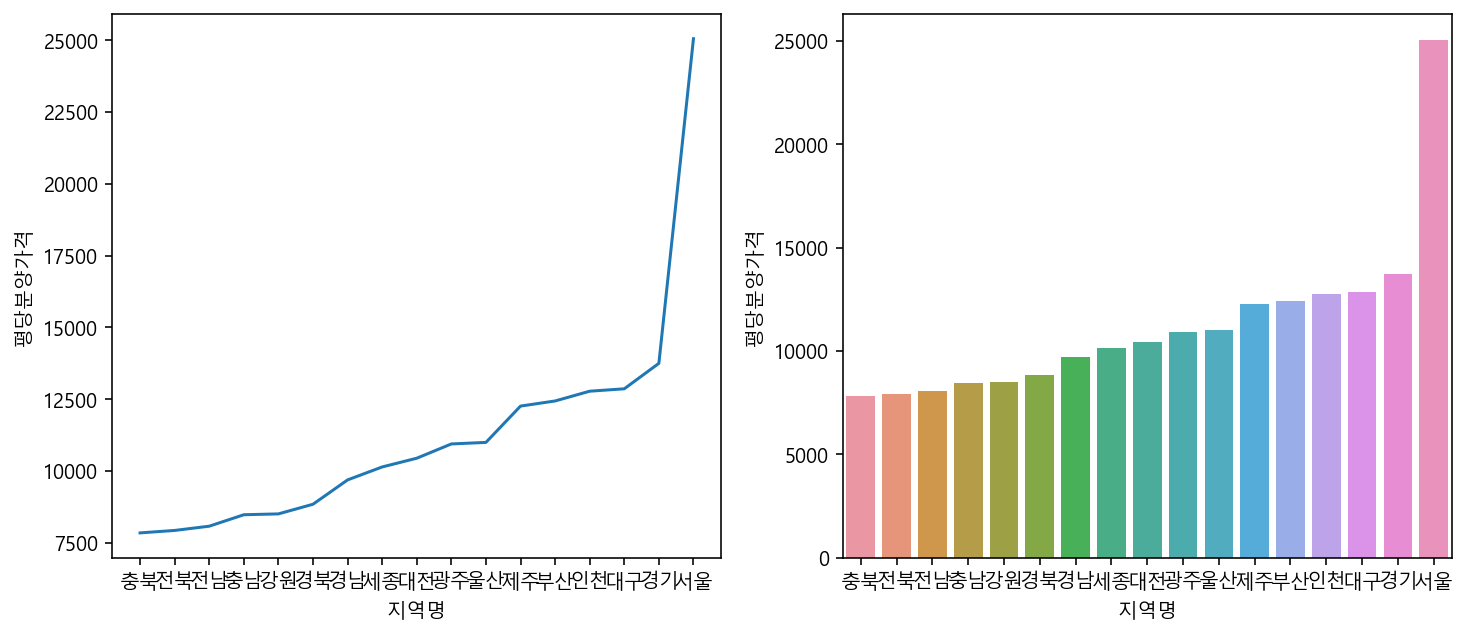

In [25]:
temp_9_2 = temp_8_2.copy()
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.lineplot(data = temp_9_2, x = '지역명', y = '평당분양가격', ax = axes[0])
sns.barplot(data = temp_9_2, x = '지역명', y = '평당분양가격', ax = axes[1])
plt.show()

## 3) 전용면적별 평당분양가격 (평균)

In [26]:
temp_7_3 = df_last.groupby('전용면적')['전용면적','평당분양가격'].mean()
temp_7_3.reset_index(inplace=True)
temp_7_3

,전용면적,평당분양가격
0,102㎡~,12141.774419
1,60㎡,10922.374769
2,60㎡~85㎡,10841.335149
3,85㎡~102㎡,11836.749241
4,전체,10860.129360


In [27]:
temp_7_3 = df_last.pivot_table(index = '전용면적', aggfunc='mean')
temp_7_3.reset_index(inplace=True)
temp_7_3

,전용면적,연도,월,평당분양가격
0,102㎡~,2018.018411,6.441860,12141.774419
1,60㎡,2018.061922,6.426063,10922.374769
2,60㎡~85㎡,2018.066784,6.437610,10841.335149
3,85㎡~102㎡,2017.956616,6.445770,11836.749241
4,전체,2018.071867,6.449606,10860.129360


### 8-3) 7의 그래프

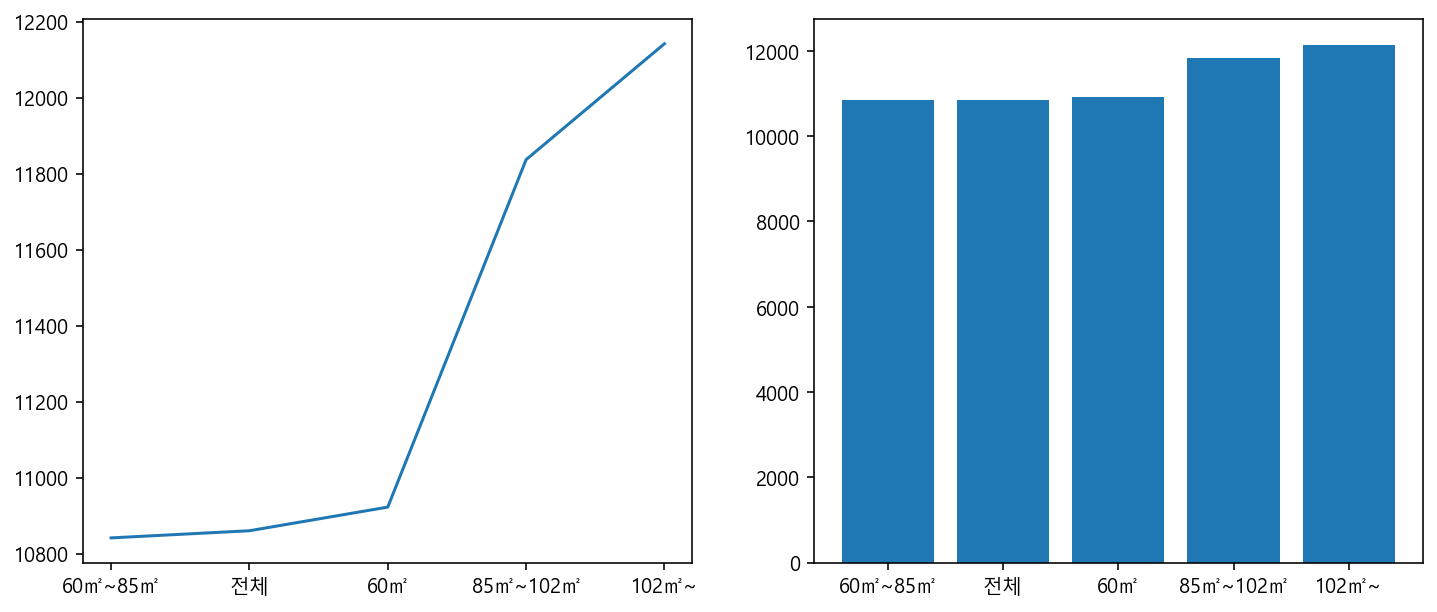

In [28]:
temp_8_3 = temp_7_3.copy()
temp_8_3.sort_values(by = '평당분양가격', inplace=True)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
axes[0].plot(temp_8_3.전용면적, temp_8_3.평당분양가격)
axes[1].bar(temp_8_3.전용면적, temp_8_3.평당분양가격)
plt.show()

### 9-3) 8의 씨본 그래프

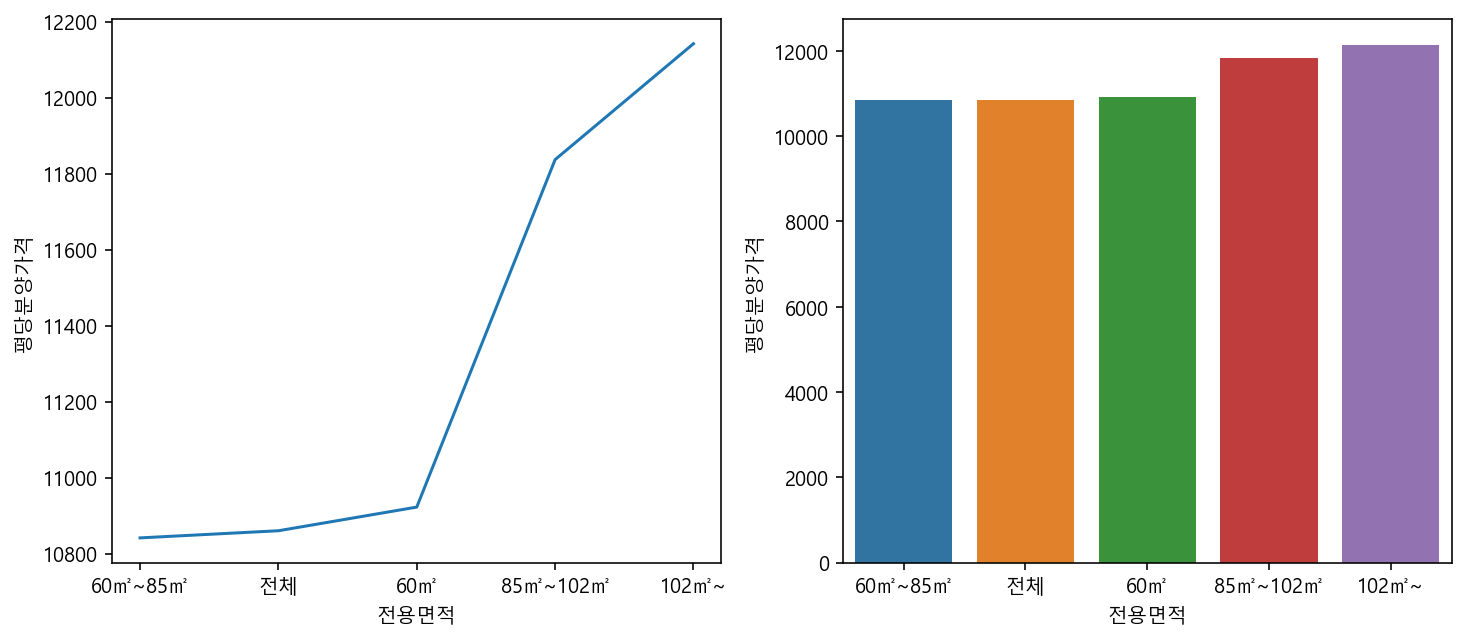

In [29]:
temp_9_3 = temp_8_3.copy()
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.lineplot(data = temp_9_3, x = '전용면적', y = '평당분양가격', ax = axes[0])
sns.barplot(data = temp_9_3, x = '전용면적', y = '평당분양가격', ax = axes[1])
plt.show()

## 4) 지역별, 전용면적별 평당분양가격 (평균)

In [30]:
temp_7_4 = df_last.groupby(['지역명', '전용면적'])['지역명','전용면적','평당분양가격'].mean()
temp_7_4.reset_index(inplace=True)
temp_7_4

,지역명,전용면적,평당분양가격
0,강원,102㎡~,9565.292647
1,강원,60㎡,8197.297059
2,강원,60㎡~85㎡,7952.320588
3,강원,85㎡~102㎡,8886.782143
4,강원,전체,7982.311765
...,...,...,...
80,충북,102㎡~,8427.569118
81,충북,60㎡,7368.705882
82,충북,60㎡~85㎡,7491.922059
83,충북,85㎡~102㎡,8493.050000


In [31]:
temp_7_4 = df_last.pivot_table(index = ['지역명', '전용면적'], aggfunc='mean')
temp_7_4.reset_index(inplace=True)
temp_7_4 = temp_7_4[['지역명', '전용면적', '평당분양가격']]
temp_7_4

,지역명,전용면적,평당분양가격
0,강원,102㎡~,9565.292647
1,강원,60㎡,8197.297059
2,강원,60㎡~85㎡,7952.320588
3,강원,85㎡~102㎡,8886.782143
4,강원,전체,7982.311765
...,...,...,...
80,충북,102㎡~,8427.569118
81,충북,60㎡,7368.705882
82,충북,60㎡~85㎡,7491.922059
83,충북,85㎡~102㎡,8493.050000


### 8-4) 7의 그래프

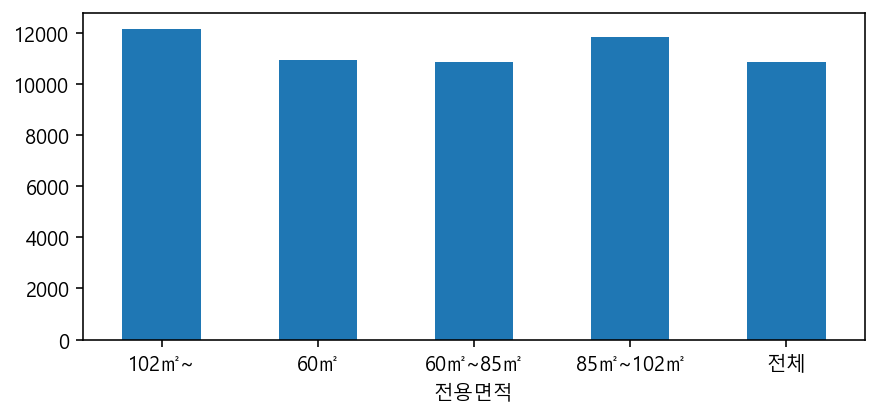

In [32]:
df_last.groupby('전용면적')['평당분양가격'].mean().plot(kind='bar', 
                                             rot=0, figsize=(7,3))
plt.show()

### 9-4) 8의 seaborn 그래프

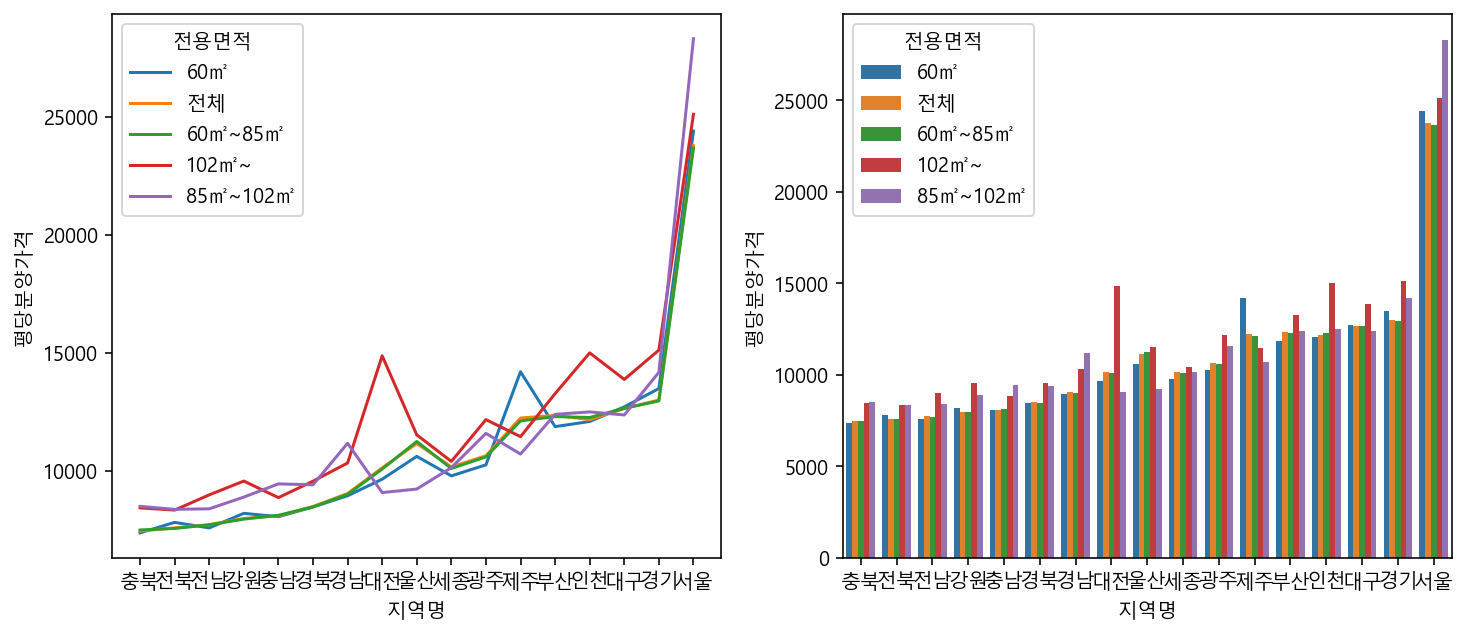

In [33]:
temp_9_4 = temp_7_4.copy()
temp_9_4.sort_values(by = '평당분양가격', inplace=True)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.lineplot(data = temp_9_4, x = '지역명', y = '평당분양가격', ax = axes[0], hue = '전용면적')
sns.barplot(data = temp_9_4, x = '지역명', y = '평당분양가격', ax = axes[1], hue = '전용면적')
plt.show()

## 5) 연도, 지역별 평당분양가격 (평균)

In [34]:
temp_7_5 = df_last.groupby(['지역명', '연도'])['지역명','연도','평당분양가격'].mean()

temp_7_5 = temp_7_5.drop('연도', axis=1)
temp_7_5 = temp_7_5.unstack()
temp_7_5

평당분양가격                                                          \
연도        2015          2016          2017          2018          2019   
지역명                                                                      
강원    7188.060   7162.903846   7318.850000   8219.255000   8934.475000   
경기   11060.940  11684.970000  12296.185000  14258.420000  15665.540000   
경남    8459.220   8496.730000   8806.600000   9327.670000  10697.615789   
경북    7464.160   7753.405000   8288.063793   8680.776923   9050.250000   
광주    7916.700   9190.683333   9599.700000   9526.953333  12111.675000   
대구    9018.900  10282.030000  12191.972222  12139.252632  14081.650000   
대전    8190.600   8910.733333   9912.910526  10234.106667  12619.200000   
부산   10377.400  10743.535000  11637.615000  12889.965000  13537.865000   
서울   20315.680  21753.435000  21864.095000  23202.245000  28286.830000   
세종    8765.020   8857.805000   9132.945763  10340.463158  11299.394118   
울산    9367.600   9582.574138  10630.160870  10241.400000  10216.250000   
인천   10976.020  11099.055000  11672.430000  11881.532143  13249.775000   
전남    6798.880   6936.600000   7413.230000   7929.845000   8219.275862   
전북    7110.400   6906.625000   7406.126316   8174.595000   8532.260000   
제주    7951.075   9567.480000  12628.539623  11935.968000  11828.469231   
충남    7689.880   7958.225000   8157.315517   8201.820000   8748.840000   
충북    6828.800   7133.335000   7462.565000   8149.295000   7970.875000   

                                 
연도           2020          2021  
지역명                              
강원   10302.423214  10539.540000  
경기   15106.080000  14701.764000  
경남   10919.272222  11289.168000  
경북    9997.693750  11152.680000  
광주   13406.485714  13711.637500  
대구   15314.200000  15622.200000  
대전   11238.844737  11222.860000  
부산   13353.010000  13724.304000  
서울   29781.015000  28832.364000  
세종   11628.100000  12502.380000  
울산   12837.600000  14212.942857  
인천   14982.990000  16107.828000  
전남    9562.398214   9839.148000  
전북    8559.430000   8485.092000  
제주   14192.876923  20672.364706  
충남    9139.380000   9527.817391  
충북    8358.956897   8806.776000

In [35]:
temp7_5 = df_last.pivot_table(index = ['지역명', '연도'], aggfunc='mean')
temp_7_5 = temp7_5.drop('월', axis= 1).unstack()
temp_7_5

평당분양가격                                                          \
연도        2015          2016          2017          2018          2019   
지역명                                                                      
강원    7188.060   7162.903846   7318.850000   8219.255000   8934.475000   
경기   11060.940  11684.970000  12296.185000  14258.420000  15665.540000   
경남    8459.220   8496.730000   8806.600000   9327.670000  10697.615789   
경북    7464.160   7753.405000   8288.063793   8680.776923   9050.250000   
광주    7916.700   9190.683333   9599.700000   9526.953333  12111.675000   
대구    9018.900  10282.030000  12191.972222  12139.252632  14081.650000   
대전    8190.600   8910.733333   9912.910526  10234.106667  12619.200000   
부산   10377.400  10743.535000  11637.615000  12889.965000  13537.865000   
서울   20315.680  21753.435000  21864.095000  23202.245000  28286.830000   
세종    8765.020   8857.805000   9132.945763  10340.463158  11299.394118   
울산    9367.600   9582.574138  10630.160870  10241.400000  10216.250000   
인천   10976.020  11099.055000  11672.430000  11881.532143  13249.775000   
전남    6798.880   6936.600000   7413.230000   7929.845000   8219.275862   
전북    7110.400   6906.625000   7406.126316   8174.595000   8532.260000   
제주    7951.075   9567.480000  12628.539623  11935.968000  11828.469231   
충남    7689.880   7958.225000   8157.315517   8201.820000   8748.840000   
충북    6828.800   7133.335000   7462.565000   8149.295000   7970.875000   

                                 
연도           2020          2021  
지역명                              
강원   10302.423214  10539.540000  
경기   15106.080000  14701.764000  
경남   10919.272222  11289.168000  
경북    9997.693750  11152.680000  
광주   13406.485714  13711.637500  
대구   15314.200000  15622.200000  
대전   11238.844737  11222.860000  
부산   13353.010000  13724.304000  
서울   29781.015000  28832.364000  
세종   11628.100000  12502.380000  
울산   12837.600000  14212.942857  
인천   14982.990000  16107.828000  
전남    9562.398214   9839.148000  
전북    8559.430000   8485.092000  
제주   14192.876923  20672.364706  
충남    9139.380000   9527.817391  
충북    8358.956897   8806.776000

### 8-5) 7의 그래프

### 9-5) 8의 seaborn 그래프

# 10. df_first와 df_last를 합치기

In [36]:
temp_10_last = df_last.copy()
temp_10_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
5773,경남,2021,5,13500.3,85㎡~102㎡
5774,경남,2021,5,10635.9,102㎡~
5775,제주,2021,5,24783.0,전체
5777,제주,2021,5,24740.1,60㎡~85㎡


In [37]:
df_first.head(5)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [38]:
temp_10_first = df_first.melt(id_vars='지역', var_name='연월', value_name='평당분양가격')
temp_10_first

,지역,연월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [39]:
def to_Y(x) :
    x = x.replace('월','')
    if x.find('년') != -1 :
        temp_10_2 = x.split('년')
        return temp_10_2[0]
    else :
        x_1 = x[:4]
        x_2 = x[4:]        
        temp_10_2 = [x_1, x_2]
        return temp_10_2[0]

In [40]:
def to_D(x) :
    x = x.replace('월','')
    if x.find('년') != -1 :
        temp_10_2 = x.split('년')
        return temp_10_2[1]
    else :
        x_1 = x[:4]
        x_2 = x[4:]        
        temp_10_2 = [x_1, x_2]
        return temp_10_2[1]

In [41]:
temp_10_first['연도'] = temp_10_first['연월'].map(to_Y)
temp_10_first['월'] = temp_10_first['연월'].map(to_D)
temp_10_first.head(5)

,지역,연월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [42]:
temp_10_first.drop('연월', axis=1, inplace=True)
temp_10_first.rename(columns={'지역':'지역명'}, inplace=True)
temp_10_first

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12
...,...,...,...,...
352,전북,6580,2015,8
353,전남,6289,2015,8
354,경북,7037,2015,8
355,경남,7665,2015,8


In [43]:
temp_10_result = pd.concat([temp_10_first, temp_10_last])
temp_10_result

,지역명,평당분양가격,연도,월,전용면적
0,서울,18189.0,2013,12,NaN
1,부산,8111.0,2013,12,NaN
2,대구,8080.0,2013,12,NaN
3,인천,10204.0,2013,12,NaN
4,광주,6098.0,2013,12,NaN
...,...,...,...,...,...
5773,경남,13500.3,2021,5,85㎡~102㎡
5774,경남,10635.9,2021,5,102㎡~
5775,제주,24783.0,2021,5,전체
5777,제주,24740.1,2021,5,60㎡~85㎡


## 10-1) 연도별 평당분양가격

In [44]:
temp_10_1 = temp_10_result.groupby(['연도']).mean()
temp_10_1.reset_index(inplace=True)
temp_10_1

,연도,평당분양가격
0,2015,9202.735802
1,2016,9683.025000
2,2017,10372.928923
3,2018,10978.938411
4,2019,12188.293092
5,2020,13039.422449
6,2021,13516.362750
7,2013,8059.294118
8,2014,8362.254902
9,2015,8619.360294


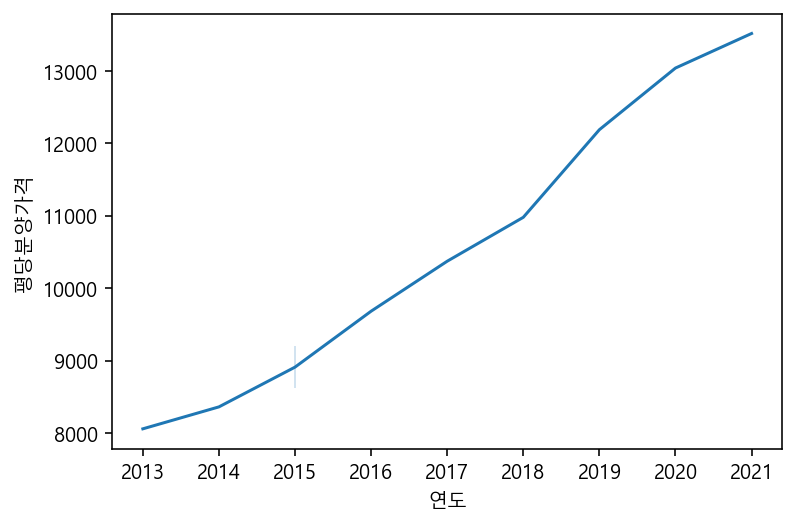

In [45]:
temp_10_1.sort_values(by = '평당분양가격', inplace=True)
temp_10_1['연도'] = temp_10_1['연도'].astype(str)
sns.lineplot(data = temp_10_1, x = '연도', y = '평당분양가격')
plt.show()

## 10-2) 연도별 지역별 평당분양가격

In [46]:
temp_10_2 = temp_10_result.groupby(['지역명', '연도']).mean()
temp_10_2.reset_index(inplace=True)
temp_10_2

,지역명,연도,평당분양가격
0,강원,2015,7188.060000
1,강원,2016,7162.903846
2,강원,2017,7318.850000
3,강원,2018,8219.255000
4,강원,2019,8934.475000
...,...,...,...
165,충북,2020,8358.956897
166,충북,2021,8806.776000
167,충북,2013,6589.000000
168,충북,2014,6620.000000


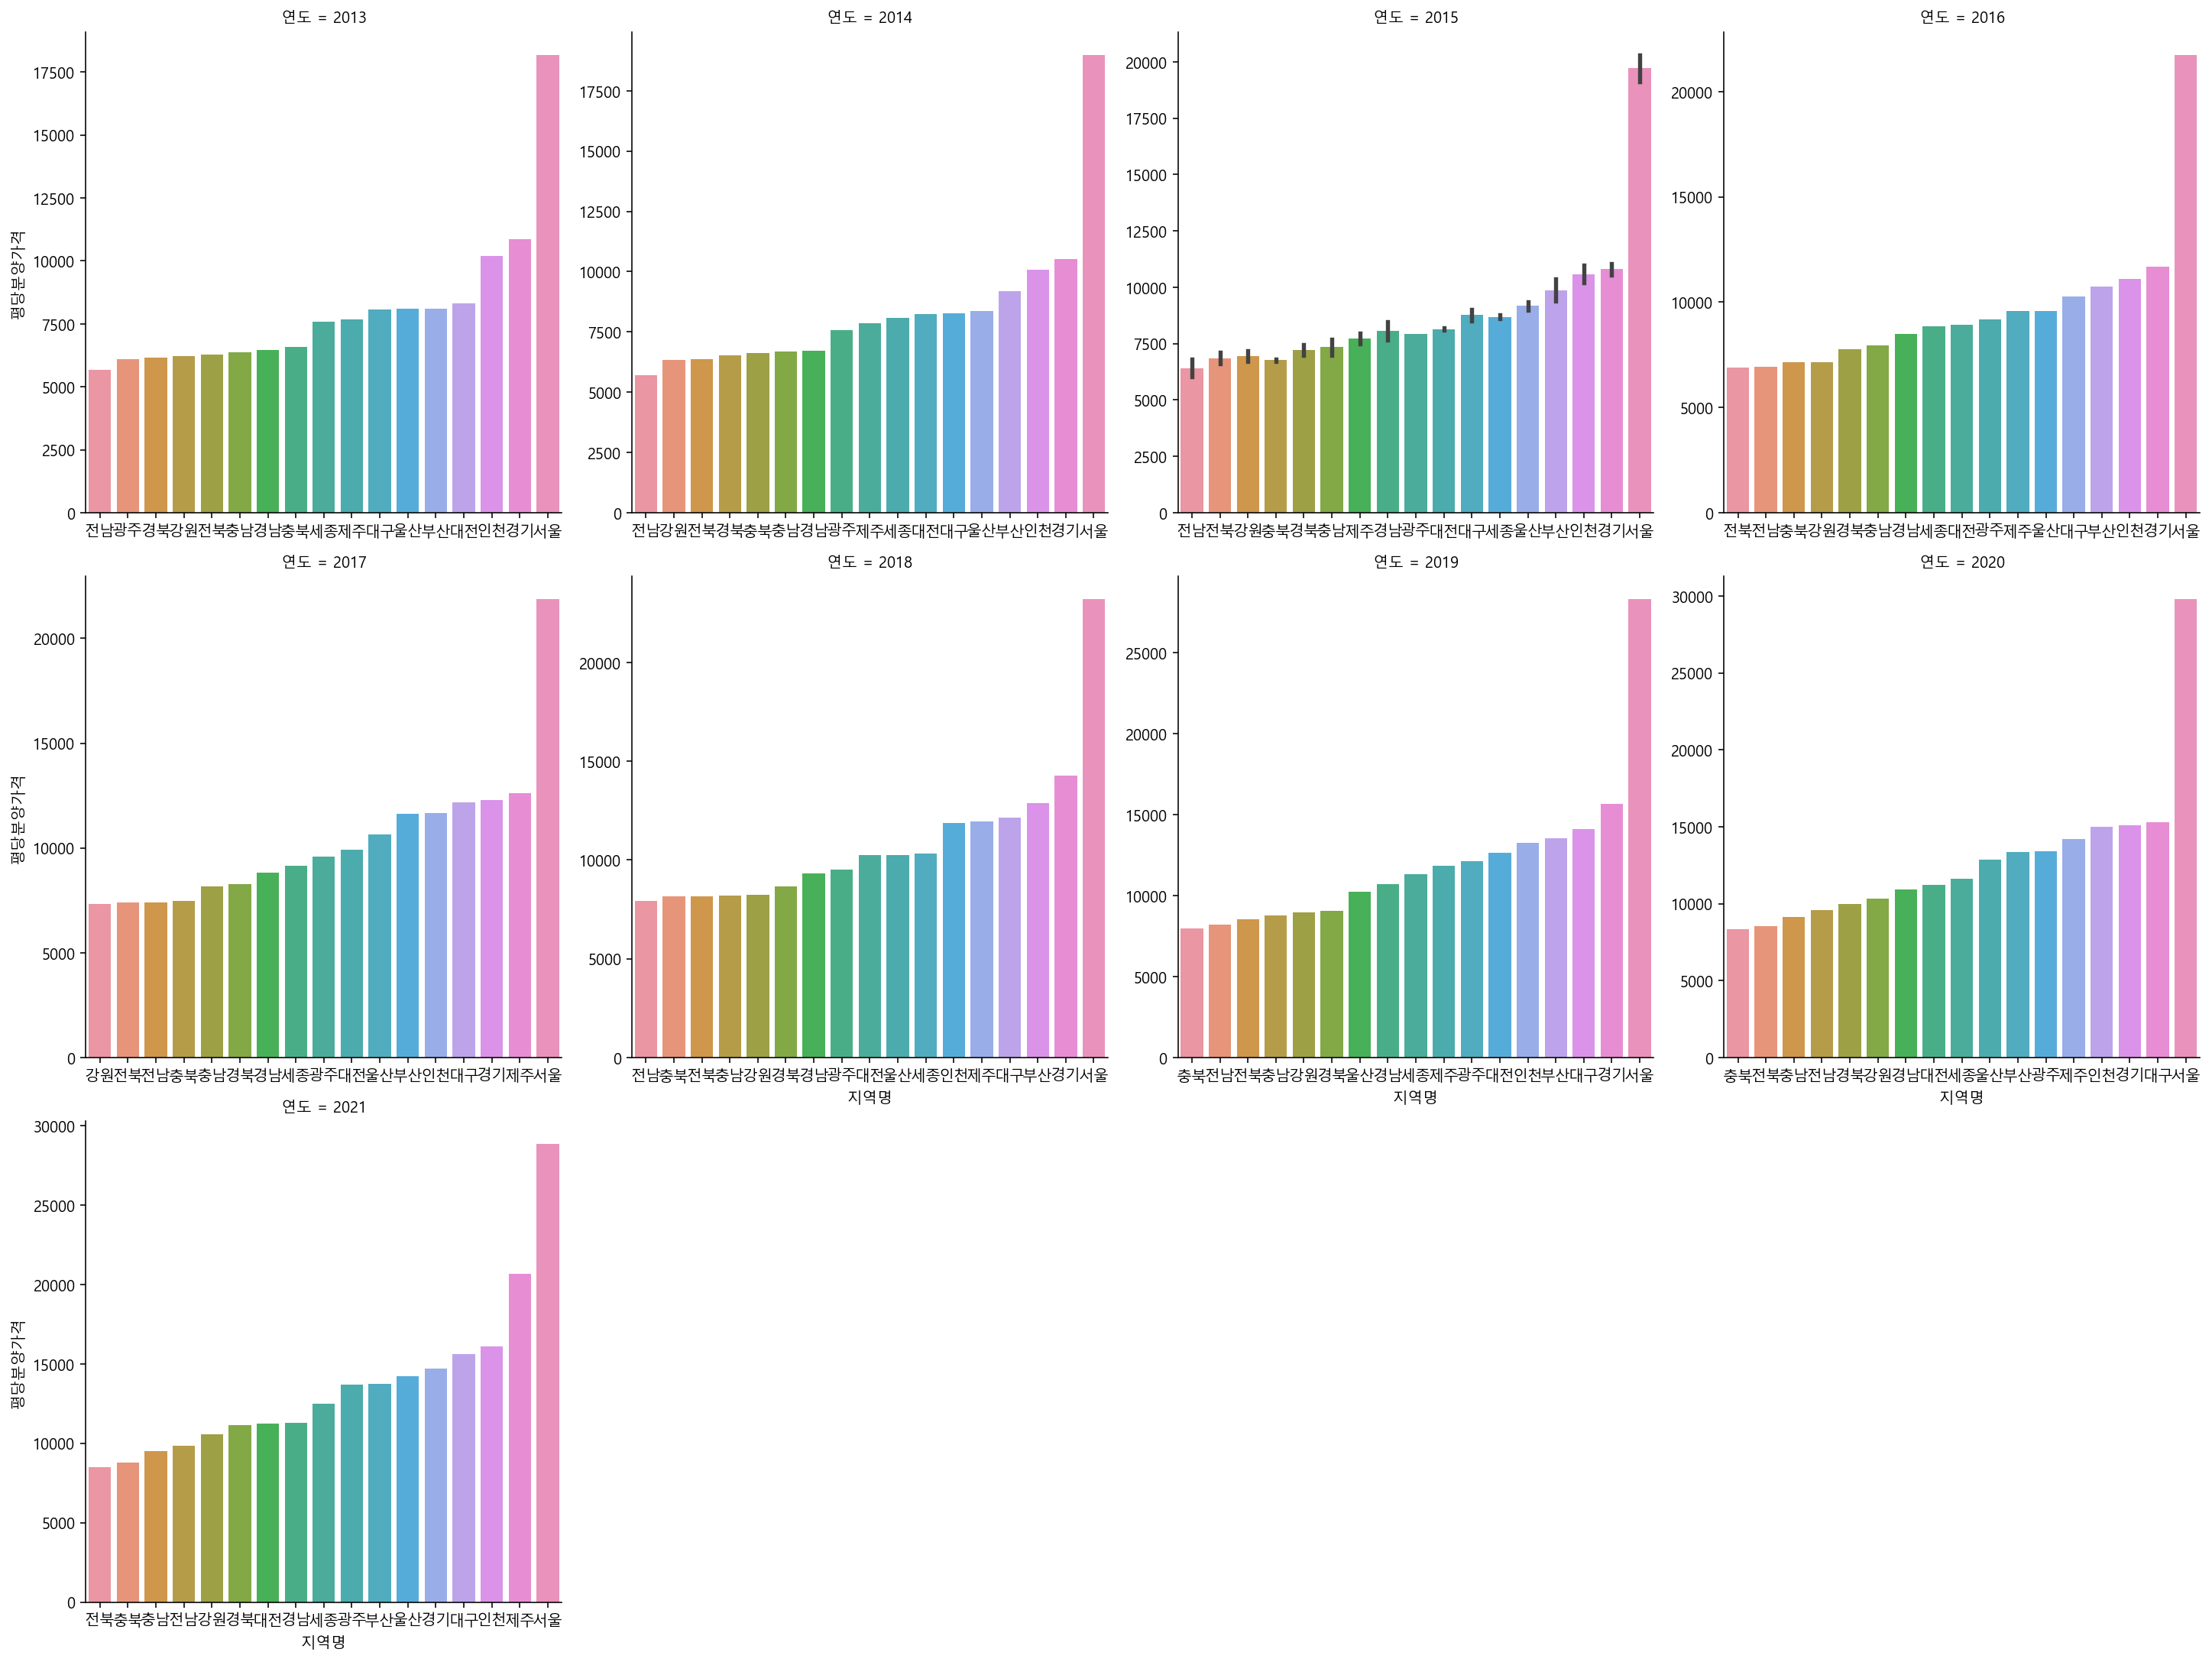

In [47]:
temp_10_2.sort_values(by = '평당분양가격', inplace=True)
temp_10_2['연도'] = temp_10_2['연도'].astype(str)
sns.catplot(data=temp_10_2, x='지역명', y="평당분양가격", 
            kind='bar', col="연도", col_wrap=4, sharey=False, sharex=False)
plt.show()